<a href="https://colab.research.google.com/github/Samreeneducation/thesis/blob/master/algorithmsresult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
from google.colab import files
uploaded = files.upload()

Saving datatestclean.csv to datatestclean.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving datatrainclean.csv to datatrainclean.csv


In [0]:
df_scraped = pd.read_csv('datatestclean.csv')


In [0]:
df_scraped.head()

,id,clean_comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,c03f72fd8f8bf54f,b'carioca rfa thanks for your support on my re...,0,0,0,0,0,0
1,9e5b8e8fc1ff2e84,b' birthday no worries it is what i do enjoy u...,0,0,0,0,0,0
2,5332799e706665a6,b'pseudoscience category i am assuming that th...,0,0,0,0,0,0
3,dfa7d8f0b4366680,b'and if such phrase exists it would be provid...,0,0,0,0,0,0
4,64479b84de1d00c1,b' october utc ps the delta function i use in ...,0,0,0,0,0,0


In [0]:
df_public= pd.read_csv('datatrainclean.csv')

In [0]:
df_public=df = df_public.reset_index()

In [0]:
df_scraped.head(2)


,clean_comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,b'carioca rfa thanks for your support on my re...,0,0,0,0,0,0
1,b' birthday no worries it is what i do enjoy u...,0,0,0,0,0,0


In [0]:
df_scraped.drop_duplicates(inplace = True)
#df_scraped.drop('id',axis = 'columns', inplace = True)

In [0]:
results = pd.DataFrame(re)

In [0]:
results = {}
final_results = []

In [0]:
df_public.head(2)

,level_0,index,clean_comment,toxic,severe_toxic,obscene,threat,insult,identity_hate,cyberbully
0,0,0,b' conflict of interest note by your user name...,0,0,0,0,0,0,0
1,1,1,b'update actually i changed this to something ...,0,0,0,0,0,0,0


In [0]:
df_public.drop_duplicates(inplace = True)

In [0]:
df_public.drop_duplicates(inplace = True)
df_public.drop('level_0',axis = 'columns', inplace = True)

In [0]:
df_public.drop_duplicates(inplace = True)
df_public.drop('index',axis = 'columns', inplace = True)

In [0]:
df = pd.concat([df_scraped, df_public])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
df.dropna(inplace=True)

In [0]:
df = df.dropna(how='any')           # assign back
df.dropna(how='any', inplace=True)  

In [0]:
X = df['clean_comment']
y = df['cyberbully']

In [0]:
#Separate training and testing data:
X_train, X_test, y_train, y_test = train_test_split(df['clean_comment'], df['cyberbully'], random_state=42)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 47870
Number of rows in the training set: 35902
Number of rows in the test set: 11968


In [0]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

Analyze the results of the Pipeline¶


In [0]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [0]:
#Put Algorithms in Pipeline:
# make a list of models
models = [MultinomialNB(), DecisionTreeClassifier(), LinearSVC(), AdaBoostClassifier(), 
          RandomForestClassifier(), BaggingClassifier(),
         LogisticRegression(), SGDClassifier(), KNeighborsClassifier()]

In [0]:
re = pipeline(models, training_data, y_train, testing_data, y_test)
#results = pd.dataframe(re)
#results = results.reindex(columns = ['Algorithm'])

Training MultinomialNB
Training MultinomialNB finished in 0.03 sec
----------------------------------------------------
Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 41.45 sec
----------------------------------------------------
Training LinearSVC


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training LinearSVC finished in 3.51 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 4.56 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 14.65 sec
----------------------------------------------------
Training BaggingClassifier
Training BaggingClassifier finished in 330.27 sec
----------------------------------------------------
Training LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training LogisticRegression finished in 7.21 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.38 sec
----------------------------------------------------
Training KNeighborsClassifier
Training KNeighborsClassifier finished in 0.01 sec
----------------------------------------------------


In [0]:
pd.DataFrame(re)

In [0]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

In [0]:
results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

In [0]:
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,SGDClassifier,0.864305,0.757391,0.593164,0.665293,0.010094,0.965657,0.977910,0.865088,0.918046,0.377452
1,LinearSVC,0.852440,0.691690,0.633223,0.661167,0.007048,0.994541,0.996430,0.978955,0.987615,3.509147
2,LogisticRegression,0.862467,0.780094,0.550165,0.645259,0.014538,0.952816,0.971369,0.811725,0.884400,7.207766
3,BaggingClassifier,0.837066,0.657540,0.591327,0.622678,1.362012,0.981143,0.986159,0.928222,0.956314,330.274560
4,RandomForestClassifier,0.847594,0.741519,0.506064,0.601573,1.105924,0.988190,0.997106,0.949643,0.972796,14.646350
5,DecisionTreeClassifier,0.810912,0.579404,0.614112,0.596253,0.112943,0.999916,1.000000,0.999624,0.999812,41.450252
6,AdaBoostClassifier,0.830632,0.789167,0.348034,0.483040,0.751199,0.836555,0.804843,0.349743,0.487600,4.555349
7,MultinomialNB,0.799967,0.620309,0.309813,0.413235,0.013188,0.883182,0.818778,0.609545,0.698837,0.031776
8,KNeighborsClassifier,0.791945,0.756098,0.125322,0.215006,48.537686,0.815219,0.889209,0.193035,0.317209,0.007211


In [0]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time', 'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])


In [0]:
results.describe().loc[['min', 'max'], :]


,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.791945,0.579404,0.125322,0.215006,0.007048,0.815219,0.804843,0.193035,0.317209,0.007211
max,0.864305,0.789167,0.633223,0.665293,48.537686,0.999916,1.000000,0.999624,0.999812,330.274560


In [0]:
# store the best metric scores
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

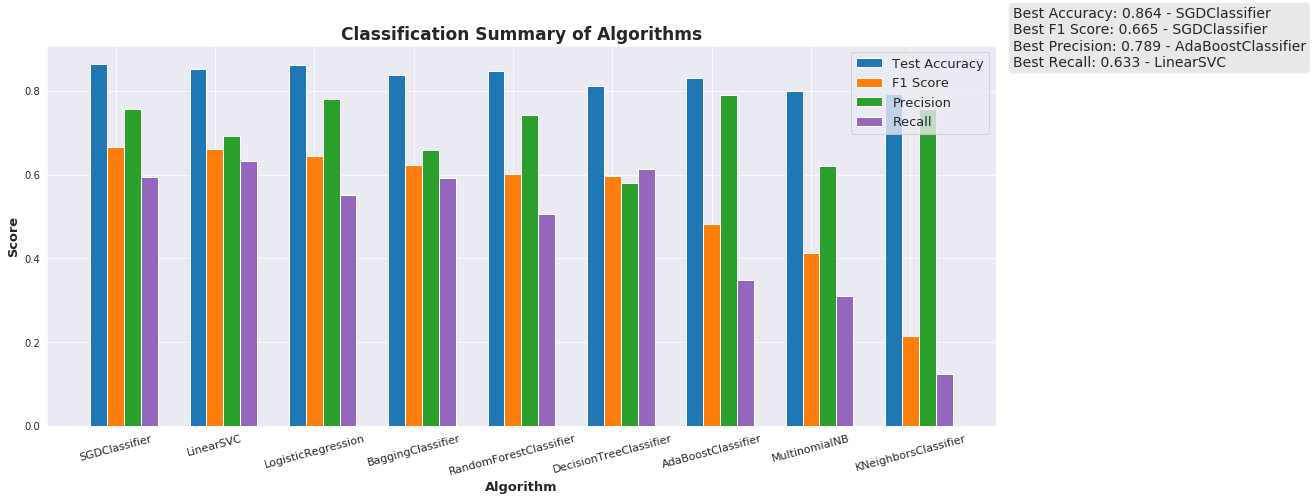

In [85]:
sns.set_style('darkgrid')
plt.figure(figsize = (17, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']
bars3 = results['Precision: Test']
bars4 = results['Recall: Test']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r3, bars3, color= pal[2], width=barWidth, edgecolor='white', label='Precision')
plt.bar(r4, bars4, color= pal[4], width=barWidth, edgecolor='white', label='Recall')

 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_precision['Precision: Test'].values[0], best_precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_recall['Recall: Test'].values[0], best_recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9.2, 1, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

In [0]:
# store the best/worst performance time
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

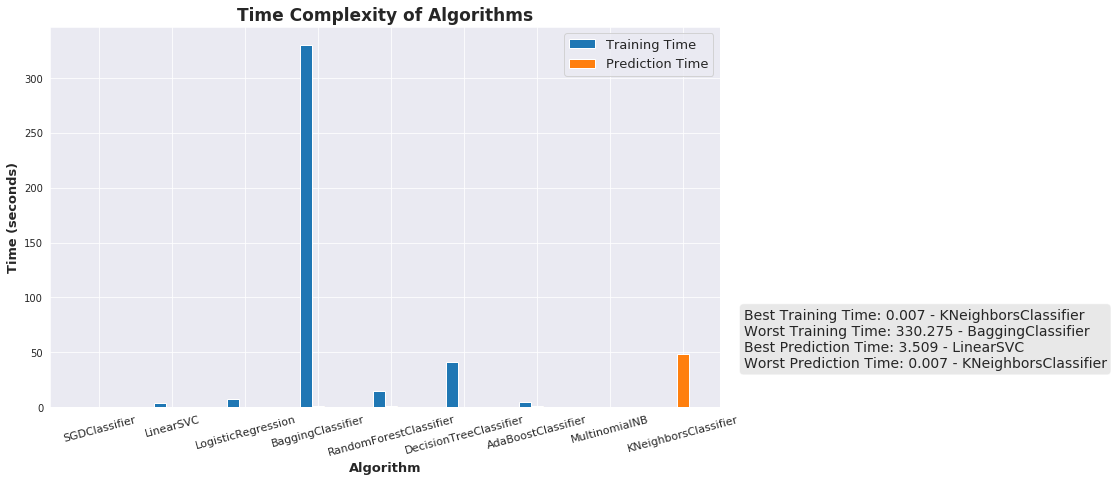

In [87]:
plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))

props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9, 36, textstr, fontsize=14,  bbox=props)

plt.title('Time Complexity of Algorithms', fontweight = 'bold', fontsize = 17);

Tuning Hyperparameters


In [0]:
def param_tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    
    # make scorer object
    scorer = make_scorer(f1_score)

    # perform Grid Search for Parameters
    grid_obj = GridSearchCV(estimator = clf,
                           param_grid = param_dict,
                           scoring = scorer,
                           cv = 5)

    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    
    # Report the before-and-afterscores
    print(clf.__class__.__name__)
    print("\nOptimized Model\n------")
    print("Best Parameters: {}".format(grid_fit.best_params_))
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("F1-score: {:.4f}".format(f1_score(y_test, best_predictions)))
    print("Precision: {:.4f}".format(precision_score(y_test, best_predictions)))
    print("Recall: {:.4f}".format(recall_score(y_test, best_predictions)))

SGDClassifier

In [89]:
# Dict for parameters
param_grid = {
    'alpha' : [0.095, 0.0002, 0.0003],
    'max_iter' : [2500, 3000, 4000]
}

clf_sgd = SGDClassifier()

param_tuning(clf_sgd, param_grid, training_data, y_train, testing_data, y_test)

SGDClassifier

Optimized Model
------
Best Parameters: {'alpha': 0.0002, 'max_iter': 2500}
Accuracy: 0.8626
F1-score: 0.6481
Precision: 0.7753
Recall: 0.5568


LogisticRegression

In [90]:
# Dict for parameters
param_grid = {
    'C': [1, 1.2, 1.3, 1.4]
}

clf_lr = LogisticRegression()

param_tuning(clf_lr, param_grid, training_data, y_train, testing_data, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression

Optimized Model
------
Best Parameters: {'C': 1.3}
Accuracy: 0.8632
F1-score: 0.6495
Precision: 0.7779
Recall: 0.5575


DecisionTreeClassifier

In [96]:
param_grid = {
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 5, 8]
}

clf_dt = DecisionTreeClassifier()

param_tuning(clf_dt, param_grid, training_data, y_train, testing_data, y_test)

KeyboardInterrupt: ignored

here i am omitting decision tree and random forest classifier from search they took so long to respond  

RandomForestClassifier

In [0]:
param_grid = {
    'n_estimators': [50,150],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 5]
}

clf_rf = RandomForestClassifier()

param_tuning(clf_rf, param_grid, training_data, y_train, testing_data, y_test)

Linear SVC:

In [94]:
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.2]
}

clf_linsvc = LinearSVC()

param_tuning(clf_linsvc, param_grid, training_data, y_train, testing_data, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC

Optimized Model
------
Best Parameters: {'C': 0.5}
Accuracy: 0.8597
F1-score: 0.6698
Precision: 0.7204
Recall: 0.6259


In [104]:
filename = 'cb_sgd_final.sav'
joblib.dump(clf_sgd, filename)

['cb_sgd_final.sav']

In [105]:
['cb_sgd_final.sav']

['cb_sgd_final.sav']

In [0]:
from google.colab import files
files.download('cb_sgd_final.sav')